## This notebook was for data exploration. 

In [8]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

### Data

In [2]:
# r'Users/amandaquay/Box\ Sync/90904_FinalProject/SanJoaquinSalinityML/
pathway = 'data_average_after.csv'
df = pd.read_csv(pathway, index_col=0).dropna()     
# extract independent variables of use
df_small = df[['salinity', 'Field_ID', 'max_CRSI', 'elevation', 'aspect', 
               'slope', 'margins', 'average_temperature', 'total_precipitation']]
df_small.head()

,salinity,Field_ID,max_CRSI,elevation,aspect,slope,margins,average_temperature,total_precipitation
0,0.010,1.0,0.774290,66,328,1,1.0,285.08047,119.0
1,1.997,1.0,0.773924,66,340,0,1.0,285.08047,119.0
2,3.827,1.0,0.781937,66,152,0,1.0,285.08047,119.0
3,3.080,1.0,0.775323,66,151,0,1.0,285.08047,119.0
4,1.092,1.0,0.766537,66,149,0,1.0,285.08047,119.0


In [3]:
df['band_1_mean_all'] = (df['band_1_mean_2007'] + df['band_1_mean_2008'] + 
                         df['band_1_mean_2009'] + df['band_1_mean_2010'] + 
                         df['band_1_mean_2011'] + df['band_1_mean_2012'] + 
                         df['band_1_mean_2013'])/5.0 
df['band_2_mean_all'] = (df['band_2_mean_2007'] + df['band_2_mean_2008'] + 
                         df['band_2_mean_2009'] + df['band_2_mean_2010'] + 
                         df['band_2_mean_2011'] + df['band_2_mean_2012'] + 
                         df['band_2_mean_2013'])/5.0 
df['band_3_mean_all'] = (df['band_3_mean_2007'] + df['band_3_mean_2008'] + 
                         df['band_3_mean_2009'] + df['band_3_mean_2010'] + 
                         df['band_3_mean_2011'] + df['band_3_mean_2012'] + 
                         df['band_3_mean_2013'])/5.0 
df['band_4_mean_all'] = (df['band_4_mean_2007'] + df['band_4_mean_2008'] + 
                         df['band_4_mean_2009'] + df['band_4_mean_2010'] + 
                         df['band_4_mean_2011'] + df['band_4_mean_2012'] + 
                         df['band_4_mean_2013'])/5.0 
df['band_5_mean_all'] = (df['band_5_mean_2007'] + df['band_5_mean_2008'] + 
                         df['band_5_mean_2009'] + df['band_5_mean_2010'] + 
                         df['band_5_mean_2011'] + df['band_5_mean_2012'] + 
                         df['band_5_mean_2013'])/5.0 
df['band_7_mean_all'] = (df['band_7_mean_2007'] + df['band_7_mean_2008'] + 
                         df['band_7_mean_2009'] + df['band_7_mean_2010'] + 
                         df['band_7_mean_2011'] + df['band_7_mean_2012'] + 
                         df['band_7_mean_2013'])/5.0 

df['band_1_mean_maxyr'] = df['Field_ID']
df['band_2_mean_maxyr'] = df['Field_ID']
df['band_3_mean_maxyr'] = df['Field_ID']
df['band_4_mean_maxyr'] = df['Field_ID']
df['band_5_mean_maxyr'] = df['Field_ID']
df['band_7_mean_maxyr'] = df['Field_ID']

In [5]:
temp_count = 0
for index, row in df.iterrows():
    temp_year = int(df['maxCRSI_year'][index])
    df['band_1_mean_maxyr'][index] = df['band_1_mean_{}'.format(temp_year)][index]
    df['band_2_mean_maxyr'][index] = df['band_2_mean_{}'.format(temp_year)][index]
    df['band_3_mean_maxyr'][index] = df['band_3_mean_{}'.format(temp_year)][index]
    df['band_4_mean_maxyr'][index] = df['band_4_mean_{}'.format(temp_year)][index]
    df['band_5_mean_maxyr'][index] = df['band_5_mean_{}'.format(temp_year)][index]
    df['band_7_mean_maxyr'][index] = df['band_7_mean_{}'.format(temp_year)][index]
    temp_count += 1
    if temp_count%100 == 0:
        print(temp_count)

/Users/amandaquay/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/amandaquay/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/amandaquay/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/amandaquay/anaconda/lib/python3.6/site-packages/ipykernel_laun

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800


In [6]:
df_outlier_removed = df[df.Field_ID != 20.0]

In [7]:
# low, high, median, mean
fields = df_small['Field_ID'].unique()
d = {'Field_ID': fields, 'min': np.zeros(22), 'median': np.zeros(22), 
     'mean': np.zeros(22), 'max': np.zeros(22), 'variance': np.zeros(22),
    'avg_max_CRSI': np.zeros(22)}
field_stats = pd.DataFrame(data=d)

i = 0
for field in fields:
    temp = []
    temp_crsi = []
    for index, row in df_small.iterrows():
        if (df_small['Field_ID'][index] == field):
            temp.append(df_small['salinity'][index])
            temp_crsi.append(df_small['max_CRSI'][index])
    field_stats['min'][i] = min(temp)
    field_stats['max'][i] = max(temp)
    field_stats['median'][i] = np.median(temp)
    field_stats['mean'][i] = np.mean(temp)
    field_stats['variance'][i] = np.var(temp)
    field_stats['avg_max_CRSI'][i] = np.mean(temp_crsi)
    i += 1
    
    


In [8]:
field_stats

,Field_ID,avg_max_CRSI,max,mean,median,min,variance
0,1.0,0.766554,17.965,6.747924,7.0230,0.010,16.015765
1,2.0,0.819767,7.278,3.361308,3.1775,1.535,1.505178
2,3.0,0.828558,18.291,7.457255,7.1405,0.083,15.816339
3,4.0,0.832619,18.775,9.137402,8.7395,4.912,5.082775
4,5.0,0.797125,16.162,8.532275,8.3850,5.126,2.909235
5,6.0,0.808823,9.166,4.163907,3.9745,0.731,3.217268
6,7.0,0.827360,5.570,3.975000,4.2660,1.943,0.890828
7,8.0,0.828951,8.908,6.764901,6.7120,3.840,1.118517
8,9.0,0.825993,11.226,7.120252,7.2790,3.424,2.853976
9,10.0,0.784759,19.211,16.933755,16.7850,15.199,0.744828


In [9]:
plt.xlim((0,23))
plt.ylim((0,35))
plt.bar(field_stats['Field_ID'], field_stats['min'])
plt.bar(field_stats['Field_ID'], field_stats['max'])
plt.xlabel('Min Salinity (dS/m)')
#plt.ylabel('Predicted Salinity (dS/m)')
plt.show()

NameError: name 'field_stats' is not defined

In [10]:
plt.figure(figsize=(8, 6))
plt.xlim(0, 23)
plt.ylim(0,40)
ax = plt.subplot(111)
ax.bar(field_stats['Field_ID']-0.3, field_stats['min'],width=0.2,color='b',align='center', label = 'min')
ax.bar(field_stats['Field_ID']-.1, field_stats['median'],width=0.2,color='c',align='center', label = 'median')
ax.bar(field_stats['Field_ID']+0.1, field_stats['mean'],width=0.2,color='g',align='center', label = 'mean')
ax.bar(field_stats['Field_ID']+0.3, field_stats['max'],width=0.2,color='r',align='center', label = 'max')
plt.legend(fontsize = 12)
plt.xlabel('Field ID', fontsize = 15)
plt.ylabel('Salinity (dS/m)', fontsize = 15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

plt.axhline(y=2, xmin=0, xmax=25, color = 'k', linestyle = '--')
plt.axhline(y=4, xmin=0, xmax=25, color = 'k', linestyle = '--')
plt.axhline(y=8, xmin=0, xmax=25, color = 'k', linestyle = '--')
plt.axhline(y=16, xmin=0, xmax=25, color = 'k', linestyle = '--')

plt.show()

NameError: name 'field_stats' is not defined

In [1]:
plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(0,10)
plt.hist(field_stats['variance'], bins=20)
plt.xlabel('Salinity (dS/m)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.show()

NameError: name 'plt' is not defined

In [6]:
plt.figure(figsize=(8,6))
plt.hist(df_outlier_removed['maxCRSI_year'], bins = 7)
plt.xlabel('max_CRSI year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.show()

NameError: name 'plt' is not defined

In [5]:
plt.figure(figsize=(8,6))
plt.hist((df_outlier_removed['ucr_precipitation'] - df_outlier_removed['total_precipitation']))
plt.xlabel('precipitation columns\' difference', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.show()

NameError: name 'plt' is not defined

In [7]:
plt.figure(figsize=(8,6))
plt.hist(df_outlier_removed['salinity'])
plt.xlabel('EVERY CELLS\' SALINITY', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.show()

NameError: name 'plt' is not defined

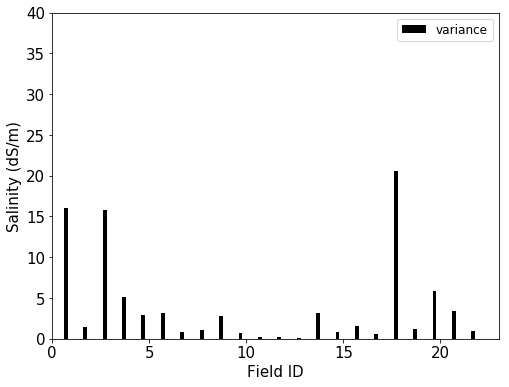

In [15]:
plt.figure(figsize=(8, 6))
plt.xlim(0, 23)
plt.ylim(0,40)
ax = plt.subplot(111)
ax.bar(field_stats['Field_ID']-0.3, field_stats['variance'],width=0.2,color='k',align='center', label = 'variance')
plt.legend(fontsize = 12)
plt.xlabel('Field ID', fontsize = 15)
plt.ylabel('Salinity (dS/m)', fontsize = 15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

plt.show()

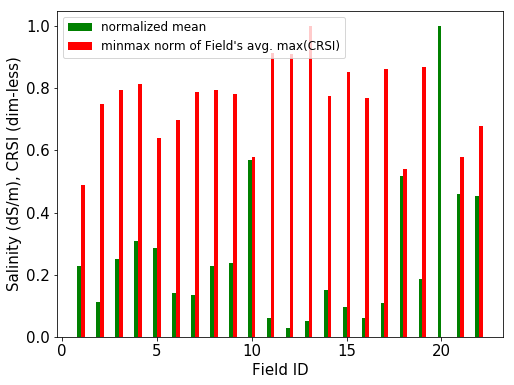

In [16]:
plt.figure(figsize=(8, 6))

ax = plt.subplot(111)

ax.bar(field_stats['Field_ID']-0.1, 
       field_stats['mean']/max(field_stats['mean']),
       width=0.2,color='g',align='center', label = 'normalized mean')
ax.bar(field_stats['Field_ID']+0.1, (field_stats['avg_max_CRSI']-min(field_stats['avg_max_CRSI']))/(max(field_stats['avg_max_CRSI'])-min(field_stats['avg_max_CRSI'])),
       width=0.2,color='r',align='center', label = 'minmax norm of Field\'s avg. max(CRSI)')
plt.legend(fontsize = 12)
plt.xlabel('Field ID', fontsize = 15)
plt.ylabel('Salinity (dS/m), CRSI (dim-less)', fontsize = 15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)


plt.show()

## Examining Fields 2 and 19 (used a random number generator to pick 2 fields to explore):
#### consider each satellite band, as well as multiple band indices
#### ASSUMPTION we are removing the outlier field from df!!!

In [17]:
df_outlier_removed = df[df.Field_ID != 20.0]
df_field_2  = df.loc[df['Field_ID'] == 2.0]
df_field_19 = df.loc[df['Field_ID'] == 19.0]

#### calculate (2013 mean) NDVI, DVI, EVI, SAVI, SI, SI2, SI3, Si4, SRSI

In [18]:
# max_CSRI has already been calculate
# CRSI = sqrt[ ((NIR*R)-(G*B)) / (NIR*R)+(G*B)) ]

# NDVI = (NIR-R)/(NIR+R)
df_field_2['NDVI'] = ((df_field_2['band_4_mean_2013'] - df_field_2['band_3_mean_2013'])/(df_field_2['band_4_mean_2013'] + df_field_2['band_3_mean_2013']))
df_field_19['NDVI'] = ((df_field_19['band_4_mean_2013'] - df_field_19['band_3_mean_2013'])/(df_field_19['band_4_mean_2013'] + df_field_19['band_3_mean_2013']))
df_outlier_removed['NDVI'] = ((df_outlier_removed['band_4_mean_2013'] - df_outlier_removed['band_3_mean_2013'])/(df_outlier_removed['band_4_mean_2013'] + df_outlier_removed['band_3_mean_2013']))

# DVI = NIR-R
df_field_2['DVI'] = ((df_field_2['band_4_mean_2013'] - df_field_2['band_3_mean_2013']))
df_field_19['DVI'] = ((df_field_19['band_4_mean_2013'] - df_field_19['band_3_mean_2013']))
df_outlier_removed['DVI'] = ((df_outlier_removed['band_4_mean_2013'] - df_outlier_removed['band_3_mean_2013']))

# EVI = NIR/R
df_field_2['EVI'] = ((df_field_2['band_4_mean_2013'] / df_field_2['band_3_mean_2013']))
df_field_19['EVI'] = ((df_field_19['band_4_mean_2013'] / df_field_19['band_3_mean_2013']))
df_outlier_removed['EVI'] = ((df_outlier_removed['band_4_mean_2013'] / df_outlier_removed['band_3_mean_2013']))
                     
# SAVI = (NIR-R)/(NIR+R+.5)*1.5
df_field_2['SAVI'] = ((df_field_2['band_4_mean_2013'] - df_field_2['band_3_mean_2013'])/(df_field_2['band_4_mean_2013'] + df_field_2['band_3_mean_2013'] + 0.5))*1.5
df_field_19['SAVI'] = ((df_field_19['band_4_mean_2013'] - df_field_19['band_3_mean_2013'])/(df_field_19['band_4_mean_2013'] + df_field_19['band_3_mean_2013'] + 0.5))*1.5
df_outlier_removed['SAVI'] = ((df_outlier_removed['band_4_mean_2013'] - df_outlier_removed['band_3_mean_2013'])/(df_outlier_removed['band_4_mean_2013'] + df_outlier_removed['band_3_mean_2013'] + 0.5))*1.5

# SI = sqrt(G*R)
df_field_2['SI'] = np.sqrt(df_field_2['band_2_mean_2013'] * df_field_2['band_3_mean_2013'])
df_field_19['SI'] = np.sqrt(df_field_19['band_2_mean_2013'] * df_field_19['band_3_mean_2013'])
df_outlier_removed['SI'] = np.sqrt(df_outlier_removed['band_2_mean_2013'] * df_outlier_removed['band_3_mean_2013'])

# SI2 = sqrt(G^2 + R^2 + NIR^2)
df_field_2['SI2'] = np.sqrt((df_field_2['band_2_mean_2013']**2) + (df_field_2['band_3_mean_2013']**2) + (df_field_2['band_4_mean_2013']**2))
df_field_19['SI2'] = np.sqrt((df_field_19['band_2_mean_2013']**2) + (df_field_19['band_3_mean_2013']**2) + (df_field_19['band_4_mean_2013']**2))
df_outlier_removed['SI2'] = np.sqrt((df_outlier_removed['band_2_mean_2013']**2) + (df_outlier_removed['band_3_mean_2013']**2) + (df_outlier_removed['band_4_mean_2013']**2))

# SI3 = sqrt(G^2 + R^2)
df_field_2['SI3'] = np.sqrt((df_field_2['band_2_mean_2013']**2) + (df_field_2['band_3_mean_2013']**2))
df_field_19['SI3'] = np.sqrt((df_field_19['band_2_mean_2013']**2) + (df_field_19['band_3_mean_2013']**2))
df_outlier_removed['SI3'] = np.sqrt((df_outlier_removed['band_2_mean_2013']**2) + (df_outlier_removed['band_3_mean_2013']**2))

# SI4 = SWIR1/NIR
df_field_2['SI4'] = ((df_field_2['band_5_mean_2013'] / df_field_2['band_4_mean_2013']))
df_field_19['SI4'] = ((df_field_19['band_5_mean_2013'] / df_field_19['band_4_mean_2013']))
df_outlier_removed['SI4'] = ((df_outlier_removed['band_5_mean_2013'] / df_outlier_removed['band_4_mean_2013']))

# SRSI = sqrt((NDVI-1)^2 + SI^2)
df_field_2['SRSI'] = np.sqrt(((df_field_2['NDVI']-1)**2) + (df_field_2['SI']**2))
df_field_19['SRSI'] = np.sqrt(((df_field_19['NDVI']-1)**2) + (df_field_19['SI']**2))
df_outlier_removed['SRSI'] = np.sqrt(((df_outlier_removed['NDVI']-1)**2) + (df_outlier_removed['SI']**2))

    

/Users/amandaquay/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/amandaquay/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/amandaquay/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

#### Create correlation plots for all the bans (1, 2, 3, 4, 5, 7), and all the indices listed above). Report cor.

In [19]:
def plot_2013_singleband_corr(in_df):
    cor_array = []
    fig = plt.figure(figsize = (14,16))
    
    sub1 = fig.add_subplot(3, 2, 1)
    temp = np.corrcoef(in_df['band_1_mean_2013'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub1.set_title('2013 Band 1, cor = %.3f' %(temp), fontsize = 30)
    sub1.scatter(in_df['band_1_mean_2013'], in_df['salinity'])
    
    sub2 = fig.add_subplot(3, 2, 2)
    temp = np.corrcoef(in_df['band_2_mean_2013'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub2.set_title('2013 Band 2, cor = %.3f' %(temp), fontsize = 30)
    sub2.scatter(in_df['band_2_mean_2013'], in_df['salinity'])
    
    sub3 = fig.add_subplot(3, 2, 3)
    temp = np.corrcoef(in_df['band_3_mean_2013'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub3.set_title('2013 Band 3, cor = %.3f' %(temp), fontsize = 30)
    sub3.scatter(in_df['band_3_mean_2013'], in_df['salinity'])
    
    sub4 = fig.add_subplot(3, 2, 4)
    temp = np.corrcoef(in_df['band_4_mean_2013'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub4.set_title('2013 Band 4, cor = %.3f' %(temp), fontsize = 30)
    sub4.scatter(in_df['band_4_mean_2013'], in_df['salinity'])
    
    sub5 = fig.add_subplot(3, 2, 5)
    temp = np.corrcoef(in_df['band_5_mean_2013'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub5.set_title('2013 Band 5, cor = %.3f' %(temp), fontsize = 30)
    sub5.scatter(in_df['band_5_mean_2013'], in_df['salinity'])
    
    sub7 = fig.add_subplot(3, 2, 6)
    temp = np.corrcoef(in_df['band_7_mean_2013'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub7.set_title('2013 Band 7, cor = %.3f' %(temp), fontsize = 30)
    sub7.scatter(in_df['band_7_mean_2013'], in_df['salinity'])
    
    
    plt.tight_layout()
    plt.show()
    
    
    return cor_array

In [20]:
def print_cor_array(in_df):
    cor_array = []
    cor_array.append(np.corrcoef(in_df['band_1_mean_2013'], in_df['salinity'])[0,1])
    cor_array.append(np.corrcoef(in_df['band_2_mean_2013'], in_df['salinity'])[0,1])
    cor_array.append(np.corrcoef(in_df['band_3_mean_2013'], in_df['salinity'])[0,1])
    cor_array.append(np.corrcoef(in_df['band_4_mean_2013'], in_df['salinity'])[0,1])
    cor_array.append(np.corrcoef(in_df['band_5_mean_2013'], in_df['salinity'])[0,1])
    cor_array.append(np.corrcoef(in_df['band_7_mean_2013'], in_df['salinity'])[0,1])
    print(cor_array)
    return cor_array

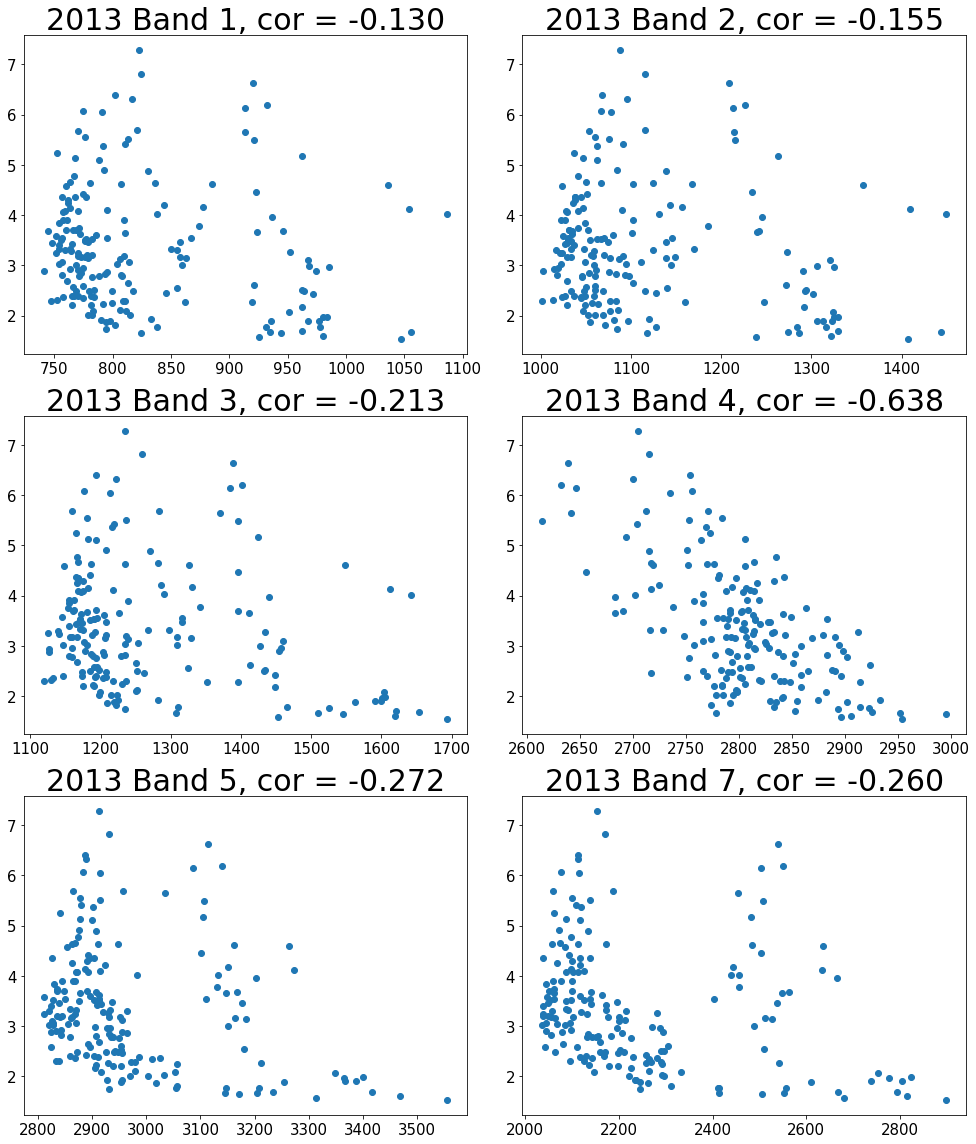

In [21]:
correlation_array_2 = plot_2013_singleband_corr(df_field_2)

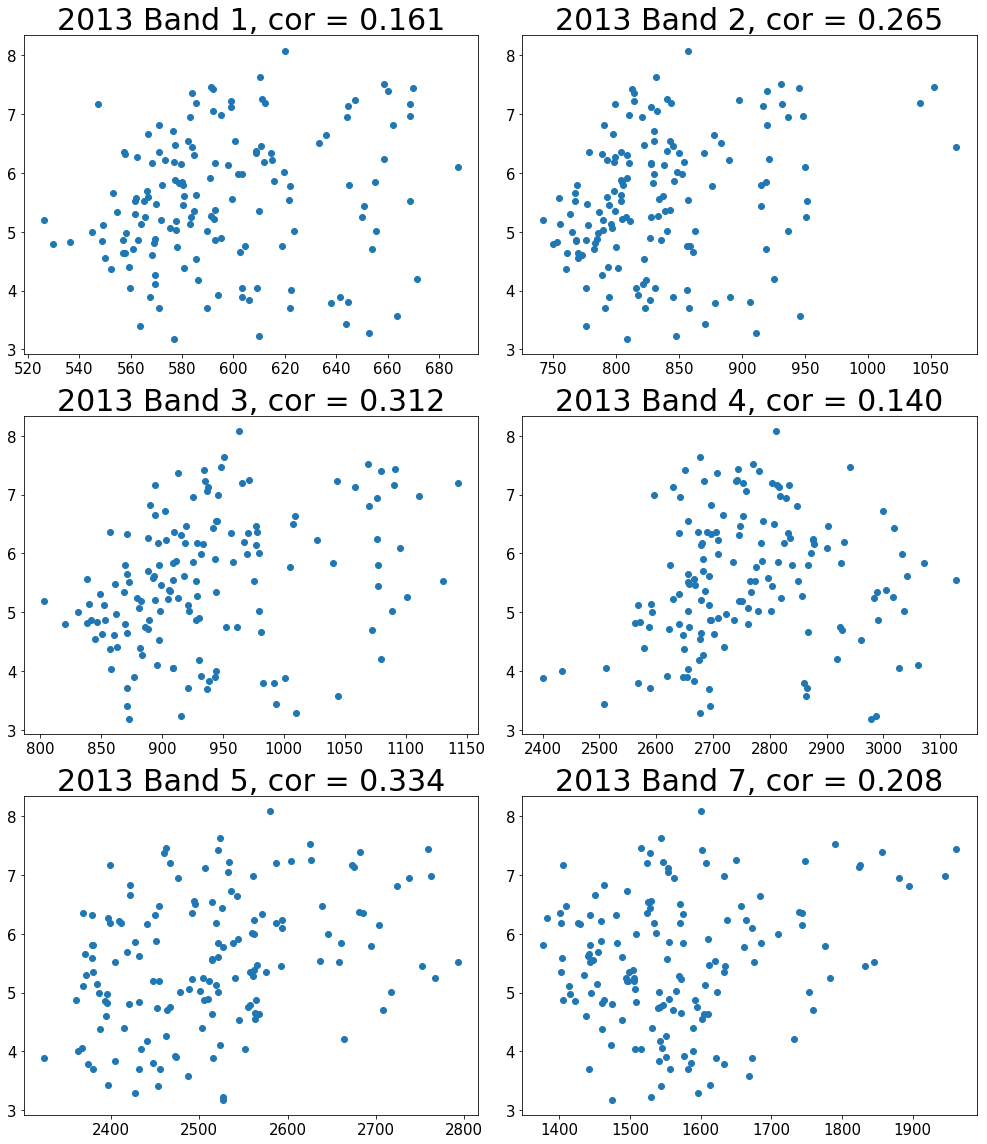

In [22]:
correlation_array_19 = plot_2013_singleband_corr(df_field_19)

/Users/amandaquay/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


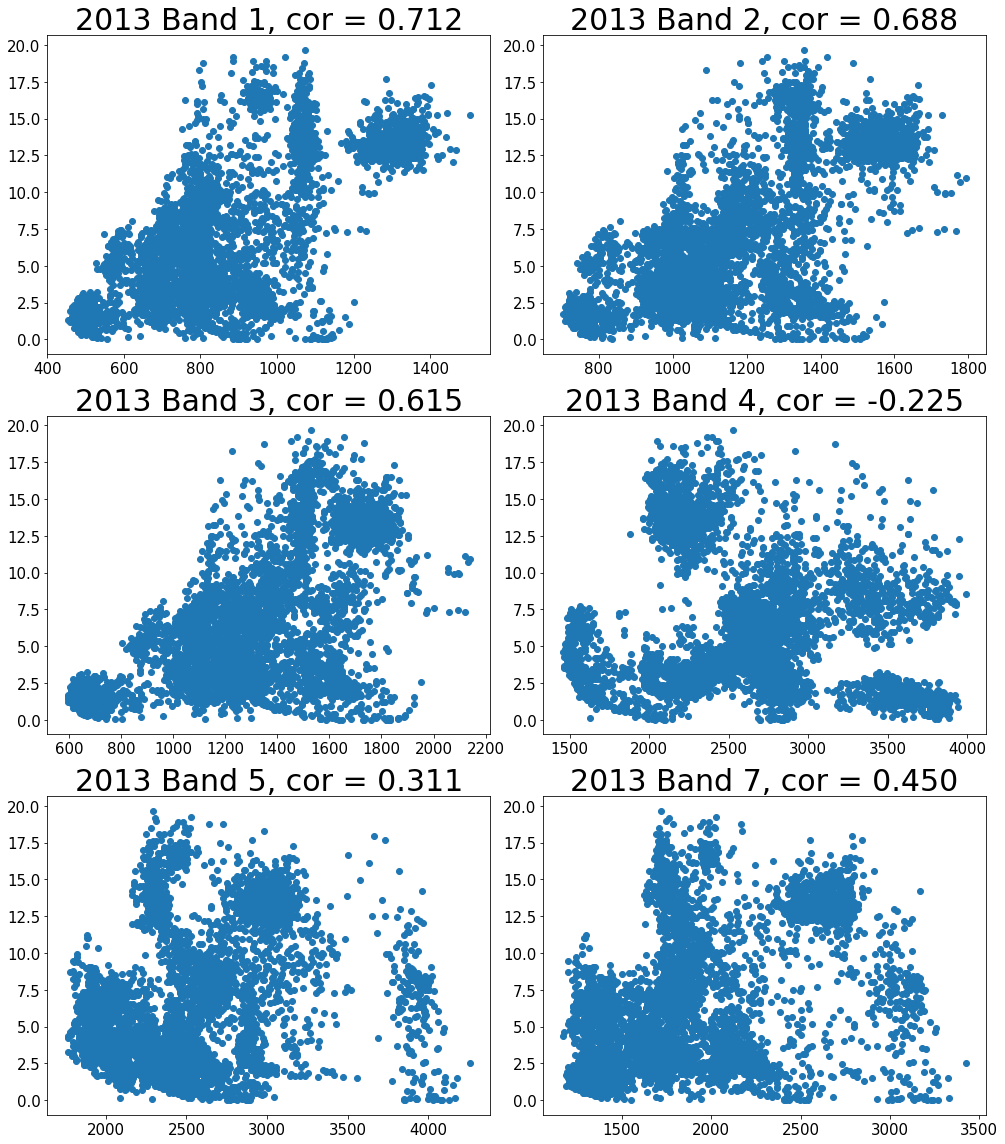

In [23]:
correlation_4 = plot_2013_singleband_corr(df_outlier_removed[df.Field_ID != 18.0])

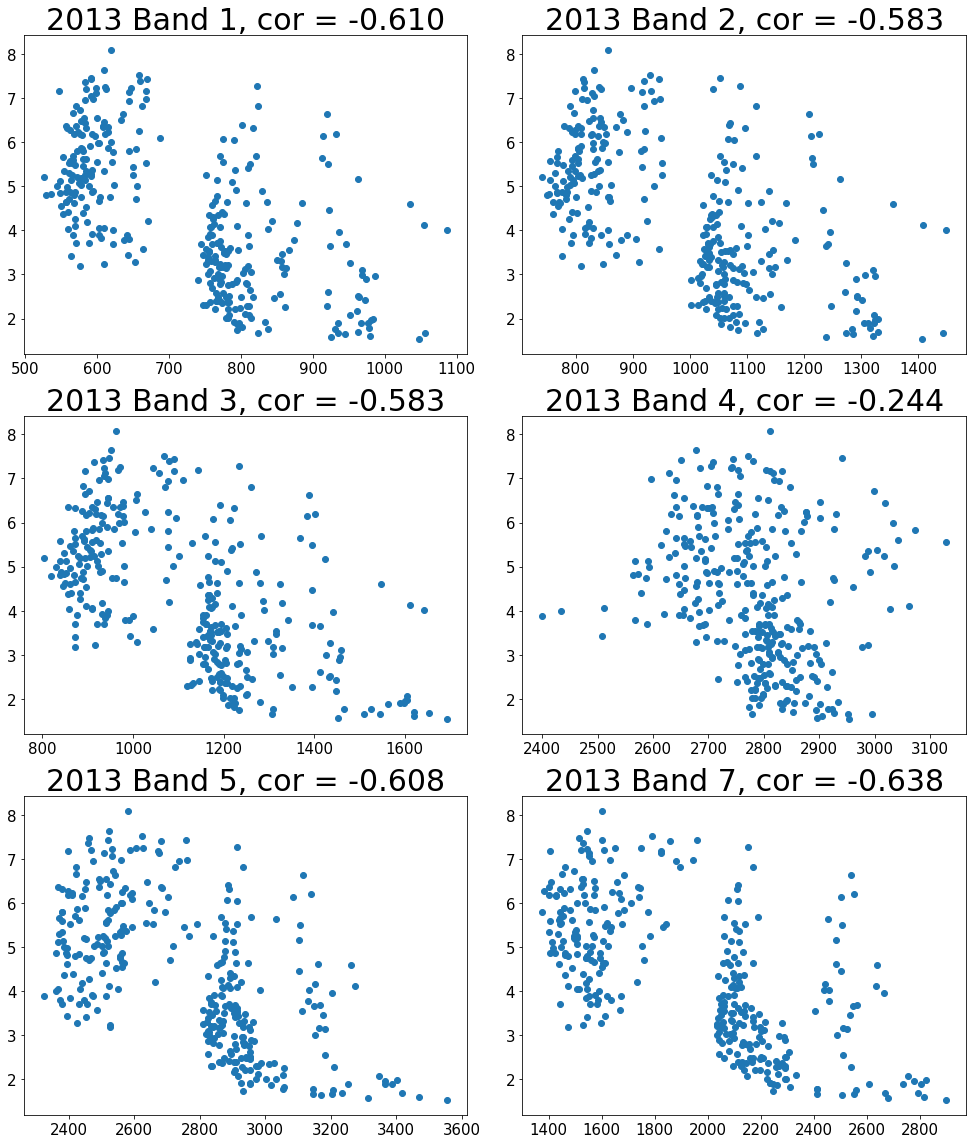

In [24]:
correlation_array = plot_2013_singleband_corr(pd.concat([df_field_2, df_field_19]))

In [25]:
def plot_2013_index_corr(in_df):
    cor_array = []
    fig = plt.figure(figsize = (14,16))
    
    sub1 = fig.add_subplot(5, 2, 1)
    temp = np.corrcoef(in_df['max_CRSI'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub1.set_title('max CRSI, cor = %.3f' %(temp), fontsize = 30)
    sub1.scatter(in_df['max_CRSI'], in_df['salinity'])
    
    sub2 = fig.add_subplot(5, 2, 2)
    temp = np.corrcoef(in_df['NDVI'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub2.set_title('NDVI, cor = %.3f' %(temp), fontsize = 30)
    sub2.scatter(in_df['NDVI'], in_df['salinity'])
    
    sub3 = fig.add_subplot(5, 2, 3)
    temp = np.corrcoef(in_df['DVI'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub3.set_title('DVI, cor = %.3f' %(temp), fontsize = 30)
    sub3.scatter(in_df['DVI'], in_df['salinity'])
    
    sub4 = fig.add_subplot(5, 2, 4)
    temp = np.corrcoef(in_df['EVI'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub4.set_title('EVI, cor = %.3f' %(temp), fontsize = 30)
    sub4.scatter(in_df['EVI'], in_df['salinity'])
    
    sub5 = fig.add_subplot(5, 2, 5)
    temp = np.corrcoef(in_df['SAVI'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub5.set_title('SAVI, cor = %.3f' %(temp), fontsize = 30)
    sub5.scatter(in_df['SAVI'], in_df['salinity'])
    
    sub6 = fig.add_subplot(5, 2, 6)
    temp = np.corrcoef(in_df['SI'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub6.set_title('SI, cor = %.3f' %(temp), fontsize = 30)
    sub6.scatter(in_df['SI'], in_df['salinity'])
    
    sub7 = fig.add_subplot(5, 2, 7)
    temp = np.corrcoef(in_df['SI2'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub7.set_title('SI2, cor = %.3f' %(temp), fontsize = 30)
    sub7.scatter(in_df['SI2'], in_df['salinity'])
    
    sub8 = fig.add_subplot(5, 2, 8)
    temp = np.corrcoef(in_df['SI3'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub8.set_title('SI3, cor = %.3f' %(temp), fontsize = 30)
    sub8.scatter(in_df['SI3'], in_df['salinity'])
    
    sub9 = fig.add_subplot(5, 2, 9)
    temp = np.corrcoef(in_df['SI4'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub9.set_title('SI4, cor = %.3f' %(temp), fontsize = 30)
    sub9.scatter(in_df['SI4'], in_df['salinity'])
    
    sub10 = fig.add_subplot(5, 2, 10)
    temp = np.corrcoef(in_df['SRSI'], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub10.set_title('SRSI, cor = %.3f' %(temp), fontsize = 30)
    sub10.scatter(in_df['SRSI'], in_df['salinity'])
    
    plt.tight_layout()
    plt.show()
    
    return cor_array

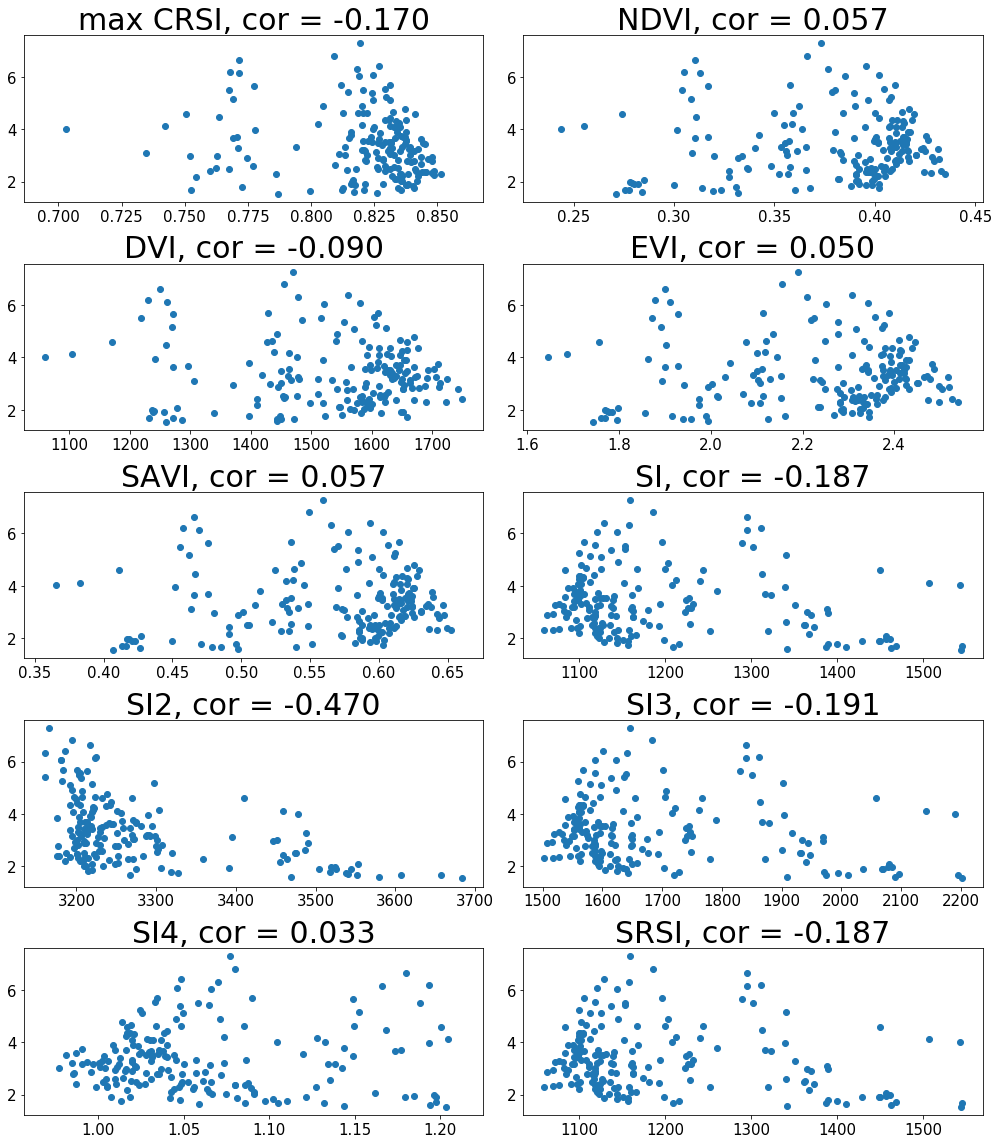

In [26]:
correlation_array = plot_2013_index_corr(df_field_2)

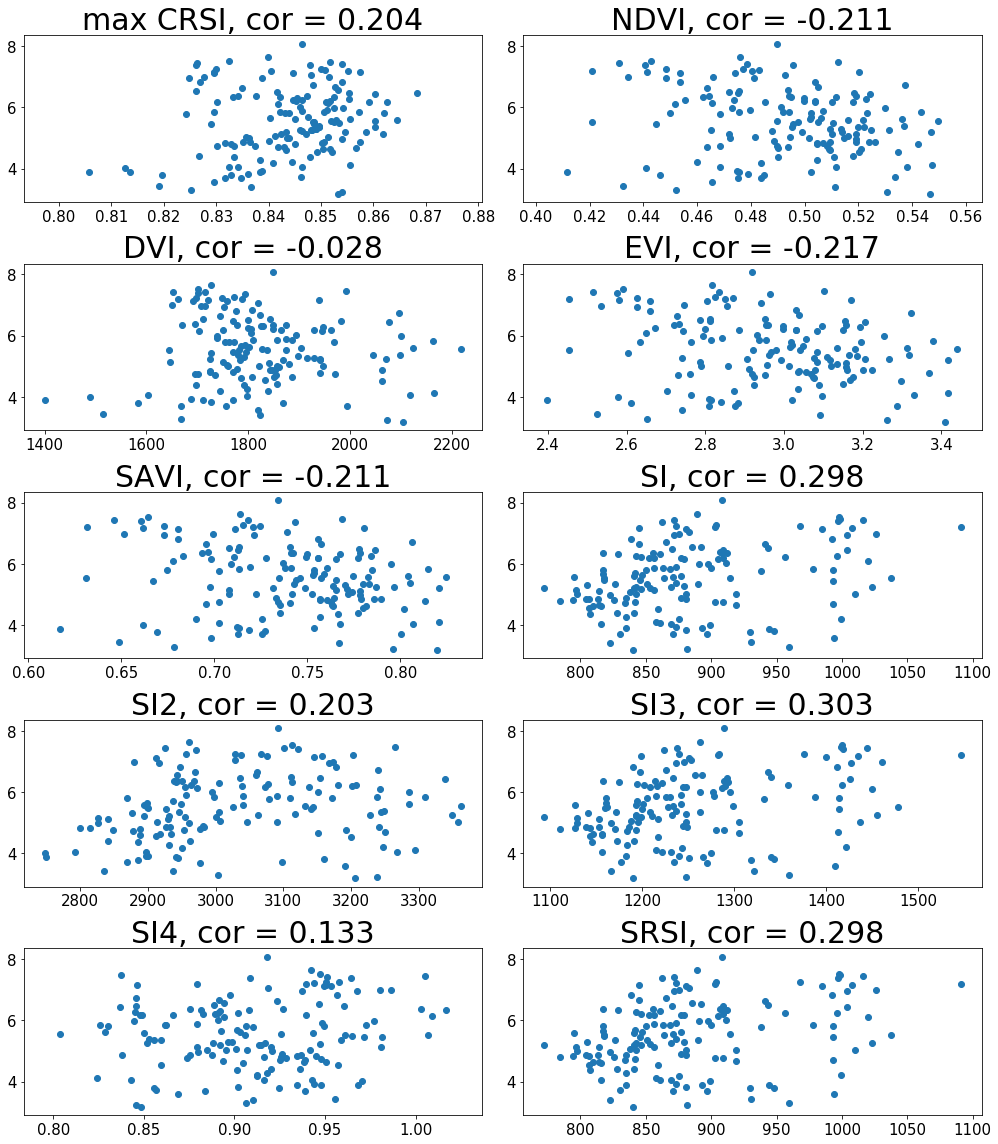

In [27]:
correlation_array = plot_2013_index_corr(df_field_19)

In [28]:
df_both_fields = pd.concat([df_field_2, df_field_19])

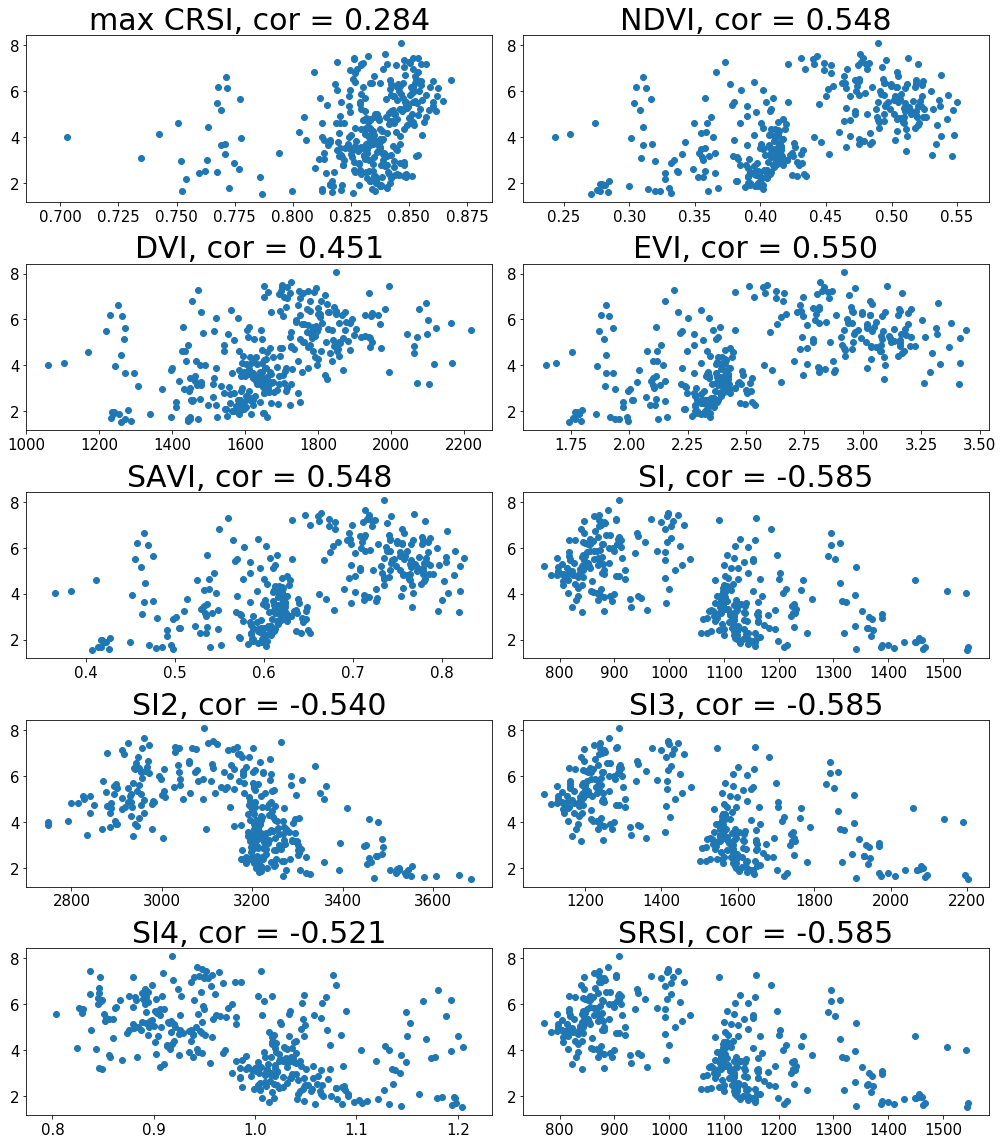

In [29]:
correlation_array = plot_2013_index_corr(pd.concat([df_field_2, df_field_19]))

## Some data modifications re: Ulmer paper etc., then export to csv

In [30]:
# NDVI = (NIR-R)/(NIR+R)
df['NDVI'] = ((df['band_4_mean_2013'] - df['band_3_mean_2013'])/(df['band_4_mean_2013'] + df['band_3_mean_2013']))
df['NDVI_all'] = ((df['band_4_mean_all'] - df['band_3_mean_all'])/(df['band_4_mean_all'] + df['band_3_mean_all']))
df['NDVI_maxyr'] = ((df['band_4_mean_maxyr'] - df['band_3_mean_maxyr'])/(df['band_4_mean_maxyr'] + df['band_3_mean_maxyr']))

# DVI = NIR-R
df['DVI'] = ((df['band_4_mean_2013'] - df['band_3_mean_2013']))
df['DVI_all'] = ((df['band_4_mean_all'] - df['band_3_mean_all']))
df['DVI_maxyr'] = ((df['band_4_mean_maxyr'] - df['band_3_mean_maxyr']))

# EVI = NIR/R
df['EVI'] = ((df['band_4_mean_2013'] / df['band_3_mean_2013']))
df['EVI_all'] = ((df['band_4_mean_all'] / df['band_3_mean_all']))
df['EVI_maxyr'] = ((df['band_4_mean_maxyr'] / df['band_3_mean_maxyr']))
                     
# SAVI = (NIR-R)/(NIR+R+.5)*1.5
df['SAVI'] = ((df['band_4_mean_2013'] - df['band_3_mean_2013'])/(df['band_4_mean_2013'] + df['band_3_mean_2013'] + 0.5))*1.5
df['SAVI_all'] = ((df['band_4_mean_all'] - df['band_3_mean_all'])/(df['band_4_mean_all'] + df['band_3_mean_all'] + 0.5))*1.5
df['SAVI_maxyr'] = ((df['band_4_mean_maxyr'] - df['band_3_mean_maxyr'])/(df['band_4_mean_maxyr'] + df['band_3_mean_maxyr'] + 0.5))*1.5

# SI = sqrt(G*R)
df['SI'] = np.sqrt(df['band_2_mean_2013'] * df['band_3_mean_2013'])
df['SI_all'] = np.sqrt(df['band_2_mean_all'] * df['band_3_mean_all'])
df['SI_maxyr'] = np.sqrt(df['band_2_mean_maxyr'] * df['band_3_mean_maxyr'])

# SI2 = sqrt(G^2 + R^2 + NIR^2)
df['SI2'] = np.sqrt((df['band_2_mean_2013']**2) + (df['band_3_mean_2013']**2) + (df['band_4_mean_2013']**2))
df['SI2_all'] = np.sqrt((df['band_2_mean_all']**2) + (df['band_3_mean_all']**2) + (df['band_4_mean_all']**2))
df['SI2_maxyr'] = np.sqrt((df['band_2_mean_maxyr']**2) + (df['band_3_mean_maxyr']**2) + (df['band_4_mean_maxyr']**2))

# SI3 = sqrt(G^2 + R^2)
df['SI3'] = np.sqrt((df['band_2_mean_2013']**2) + (df['band_3_mean_2013']**2))
df['SI3_all'] = np.sqrt((df['band_2_mean_all']**2) + (df['band_3_mean_all']**2))
df['SI3_maxyr'] = np.sqrt((df['band_2_mean_maxyr']**2) + (df['band_3_mean_maxyr']**2))

# SI4 = SWIR1/NIR
df['SI4'] = ((df['band_5_mean_2013'] / df['band_4_mean_2013']))
df['SI4_all'] = ((df['band_5_mean_all'] / df['band_4_mean_all']))
df['SI4_maxyr'] = ((df['band_5_mean_maxyr'] / df['band_4_mean_maxyr']))

# SRSI = sqrt((NDVI-1)^2 + SI^2)
df['SRSI'] = np.sqrt(((df['NDVI']-1)**2) + (df['SI']**2))
df['SRSI_all'] = np.sqrt(((df['NDVI_all']-1)**2) + (df['SI_all']**2))
df['SRSI_maxyr'] = np.sqrt(((df['NDVI_maxyr']-1)**2) + (df['SI_maxyr']**2))

    

In [32]:
df.to_csv('data_average_after_indices.csv')

In [35]:
def plot_inspec_singleband_corr(in_df, inspec): #inspec = '2013' 'all' 'maxyr'
    cor_array = []
    fig = plt.figure(figsize = (14,16))
    
    sub1 = fig.add_subplot(3, 2, 1)
    temp = np.corrcoef(in_df['band_1_mean_{}'.format(inspec)], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub1.set_title('{} Band 1, cor = %.3f'.format(inspec) %(temp), fontsize = 30)
    sub1.scatter(in_df['band_1_mean_{}'.format(inspec)], in_df['salinity'])
    
    sub2 = fig.add_subplot(3, 2, 2)
    temp = np.corrcoef(in_df['band_2_mean_{}'.format(inspec)], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub2.set_title('{} Band 2, cor = %.3f'.format(inspec) %(temp), fontsize = 30)
    sub2.scatter(in_df['band_2_mean_{}'.format(inspec)], in_df['salinity'])
    
    sub3 = fig.add_subplot(3, 2, 3)
    temp = np.corrcoef(in_df['band_3_mean_{}'.format(inspec)], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub3.set_title('{} Band 3, cor = %.3f'.format(inspec) %(temp), fontsize = 30)
    sub3.scatter(in_df['band_3_mean_{}'.format(inspec)], in_df['salinity'])
    
    sub4 = fig.add_subplot(3, 2, 4)
    temp = np.corrcoef(in_df['band_4_mean_{}'.format(inspec)], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub4.set_title('{} Band 4, cor = %.3f'.format(inspec) %(temp), fontsize = 30)
    sub4.scatter(in_df['band_4_mean_{}'.format(inspec)], in_df['salinity'])
    
    sub5 = fig.add_subplot(3, 2, 5)
    temp = np.corrcoef(in_df['band_5_mean_{}'.format(inspec)], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub5.set_title('{} Band 5, cor = %.3f'.format(inspec) %(temp), fontsize = 30)
    sub5.scatter(in_df['band_5_mean_{}'.format(inspec)], in_df['salinity'])
    
    sub7 = fig.add_subplot(3, 2, 6)
    temp = np.corrcoef(in_df['band_7_mean_{}'.format(inspec)], in_df['salinity'])[0,1]
    cor_array.append(temp)
    sub7.set_title('{} Band 7, cor = %.3f'.format(inspec) %(temp), fontsize = 30)
    sub7.scatter(in_df['band_7_mean_{}'.format(inspec)], in_df['salinity'])
    
    
    plt.tight_layout()
    plt.show()
    
    
    return cor_array

In [42]:
df_field_2  = df.loc[df['Field_ID'] == 2.0]
df_field_19 = df.loc[df['Field_ID'] == 19.0]
df_nonoutlier = df.loc[df['Field_ID'] != 20.0]